### ０～９の数字画像データ「MNIST」を使って画像から数字列の推測モデルを作成


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import  to_categorical
import numpy as np
import matplotlib.pyplot as plt
# notebookでmatplotlibの描画するのに下記の定義が必要
%matplotlib inline

In [0]:
# mnistの訓練・検証データをロード
# タプルなんだ 
# mnistの画像はすでにグレースケール化している
# 2018年はRGBの画像で使う側がグレースケールする必要があったはずだが
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<function matplotlib.pyplot.show>

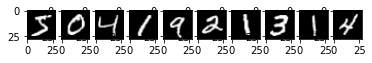

In [0]:
col = 10
# グレースケールの28x28の画像データ
for i in range(col):
  plt.subplot(1, col, i + 1)
  plt.imshow(train_images[i], 'gray')

plt.show

In [0]:
print(train_labels[0:col])

[5 0 4 1 9 2 1 3 1 4]


データ前処理<br>
minstをニューラルネットワークに適した形にする<br>
これが出来ないとそもそも学習することが出来ない

In [0]:
# 画像は縦x横の2次元だったが、これを1次元に変換する
# 元のデータ残す
resshape_train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
resshape_test_images = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))

In [0]:
print(resshape_train_images.shape)
print(resshape_test_images.shape)

(60000, 784)
(10000, 784)


In [0]:
# ラベルデータをone-hot表現にする
# 元のデータは残す
onehot_train_labels = to_categorical(train_labels)
onehot_test_labels = to_categorical(test_labels)

In [0]:
print(onehot_train_labels.shape)
print(onehot_test_labels.shape)

(60000, 10)
(10000, 10)


In [0]:
print(onehot_train_labels[0])
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


モデルを作る

In [0]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

コンパイルする

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

学習する

In [0]:
histroy = model.fit(resshape_train_images, onehot_train_labels, batch_size=500, epochs=10, validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 2s 17ms/step - loss: 1.2540 - acc: 0.6230 - val_loss: 0.4942 - val_acc: 0.8923
Epoch 2/10
96/96 [==============================] - 2s 16ms/step - loss: 0.4976 - acc: 0.8695 - val_loss: 0.3144 - val_acc: 0.9157
Epoch 3/10
96/96 [==============================] - 2s 16ms/step - loss: 0.3775 - acc: 0.8958 - val_loss: 0.2611 - val_acc: 0.9263
Epoch 4/10
96/96 [==============================] - 2s 16ms/step - loss: 0.3250 - acc: 0.9089 - val_loss: 0.2347 - val_acc: 0.9313
Epoch 5/10
96/96 [==============================] - 2s 16ms/step - loss: 0.2927 - acc: 0.9179 - val_loss: 0.2162 - val_acc: 0.9355
Epoch 6/10
96/96 [==============================] - 2s 16ms/step - loss: 0.2676 - acc: 0.9243 - val_loss: 0.2029 - val_acc: 0.9415
Epoch 7/10
96/96 [==============================] - 2s 16ms/step - loss: 0.2582 - acc: 0.9268 - val_loss: 0.1971 - val_acc: 0.9423
Epoch 8/10
96/96 [==============================] - 2s 16ms/step - loss: 0.2409 - a

In [0]:
histroy.history

{'acc': [0.4310833215713501,
  0.7282500267028809,
  0.8138124942779541,
  0.8472708463668823,
  0.8651250004768372],
 'loss': [1.739690899848938,
  0.9593813419342041,
  0.6829970479011536,
  0.5565987825393677,
  0.4852145314216614],
 'val_acc': [0.8226666450500488,
  0.8762500286102295,
  0.8958333134651184,
  0.909416675567627,
  0.9134166836738586],
 'val_loss': [1.0312424898147583,
  0.6059310436248779,
  0.4470650255680084,
  0.37181589007377625,
  0.3300892412662506]}

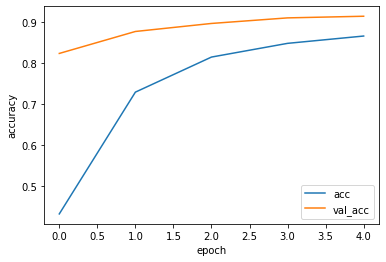

In [0]:
plt.plot(histroy.history['acc'], label='acc')
plt.plot(histroy.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(resshape_test_images, onehot_test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

313/313 [==============================] - 0s 2ms/step - loss: 0.3359 - acc: 0.9124
loss: 0.336
acc: 0.912


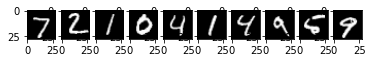

In [0]:
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(test_images[i], 'gray')
plt.show()

In [0]:
test_predictions = model.predict(resshape_test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)

[7 2 1 0 4 1 4 9 6 9]
